In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Reading the data frpm CSV to DF

In [3]:
df=pd.read_csv(r"C:\Users\apple\Desktop\Machine Learning\ML Assignment\Telcom Ass\churn_dataset.csv")

Over view of the data

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Checking for null values in the data

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.select_dtypes(include=["object"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [7]:
df.select_dtypes(include=["float64","int64"])

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [8]:
print(df.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


Spliting the data into dependent and idependent variables

In [9]:
y = df.pop("Churn")
X = df

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=44)


In [11]:
print(X_train.shape)
print(X_test.shape)

(5282, 20)
(1761, 20)


In [12]:
X_train_cat=X_train[['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
                     'PaymentMethod','SeniorCitizen']]
X_train_num = X_train[['tenure','MonthlyCharges','TotalCharges']]

In [13]:
X_test_cat=X_test[['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
                     'PaymentMethod','SeniorCitizen']]
X_test_num = X_test[['tenure','MonthlyCharges','TotalCharges']]

In [14]:
pd.options.mode.chained_assignment = None

In [15]:
###X_train_num['TotalCharges']=X_train_num['TotalCharges'].fillna(0)

##X_train_num.fillna('TotalCharges',inplace=True)

X_train_num['TotalCharges'].replace(' ',0)

4338     214.75
2111      711.9
2952     493.95
1687     314.95
5212       2763
         ...   
571        2754
1197     340.85
2801     6703.5
3491    3250.45
5908       20.2
Name: TotalCharges, Length: 5282, dtype: object

In [50]:
###X_train_num[X_train_num['TotalCharges'] == ' ']

X_test_num[X_test_num['TotalCharges'] == ' ']

###X_train_num.fillna(0, inplace=True, downcast='infer')

,tenure,MonthlyCharges,TotalCharges


In [22]:
X_train_num.at[936,'TotalCharges']=0.00
X_train_num.at[1082,'TotalCharges']=0.00
X_train_num.at[3826,'TotalCharges']=0.00
X_train_num.at[3331,'TotalCharges']=0.00
X_train_num.at[753,'TotalCharges']=0.00
X_train_num.at[5218,'TotalCharges']=0.00
X_train_num.at[488,'TotalCharges']=0.00


X_test_num.at[6754,'TotalCharges']=0.00
X_test_num.at[1340,'TotalCharges']=0.00
X_test_num.at[6670,'TotalCharges']=0.00
X_test_num.at[4380,'TotalCharges']=0.00




In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,tenure,MonthlyCharges,TotalCharges
4338,-1.106770,-0.651067,-0.909242
2111,-0.088842,-1.456701,-0.689858
2952,-0.251711,-1.490060,-0.786036
1687,-0.821750,-1.284899,-0.865025
5212,1.621276,-0.881248,0.215256


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_test_num_transformed = pd.DataFrame(scaler.fit_transform(X_test_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_test_num.index)

X_test_num_transformed.head()


,tenure,MonthlyCharges,TotalCharges
5616,0.206222,-0.322106,-0.095795
2937,1.265584,0.938778,1.625770
1355,-0.975373,-1.472848,-0.932262
5441,1.510052,0.032980,1.087436
3333,-0.853139,-1.477779,-0.917514


In [58]:
sex_encoder={'Male':1,'Female':0}
partner_encoder={'Yes':1,'No':0}
dependents_encoder={'Yes':1,'No':0}
phoneservice_encoder={'Yes':1,'No':0}
multiplelines_encoder={'No phone service':1,'No':2,'Yes':3}
internetservice_encoder={'DSL':1,'No':2,'Fiber optic':3}
onlinesecurity_encoder={'No internet service':1,'No':2,'Yes':3}
onlinebackup_encoder={'No internet service':1,'No':2,'Yes':3}
deviceprotection_encoder={'No internet service':1,'No':2,'Yes':3}
techsupport_encoder={'No internet service':1,'No':2,'Yes':3}
StreamingTV_encoder={'No internet service':1,'No':2,'Yes':3}
StreamingMovies_encoder={'No internet service':1,'No':2,'Yes':3}
Contract_encoder={'Month-to-month':1,'Two year':2,'One year':3}
PaperlessBilling_encoder={'Yes':1,'No':0}
PaymentMethod_encoder={'Credit card (automatic)':1,'Mailed check':2,'Electronic check':3,'Bank transfer (automatic)':4}

y_encoder={'Yes':1,'No':0}

In [32]:
X_train_cat['StreamingMovies'].unique()

array(['No', 'No internet service', 'Yes'], dtype=object)

In [35]:
X_train_cat_transformed = pd.DataFrame(index=X_train_cat.index)

X_train_cat_transformed.head()

""
4338
2111
2952
1687
5212


In [39]:
X_test_cat_transformed = pd.DataFrame(index=X_test_cat.index)

X_test_cat_transformed.head()

""
5616
2937
1355
5441
3333


In [36]:
X_train_cat_transformed['gender'] = X_train_cat['gender'].map(sex_encoder)
X_train_cat_transformed['Partner'] = X_train_cat['Partner'].map(partner_encoder)
X_train_cat_transformed['Dependents'] = X_train_cat['Dependents'].map(dependents_encoder)
X_train_cat_transformed['PhoneService'] = X_train_cat['PhoneService'].map(phoneservice_encoder)
X_train_cat_transformed['MultipleLines'] = X_train_cat['MultipleLines'].map(multiplelines_encoder)
X_train_cat_transformed['InternetService'] = X_train_cat['InternetService'].map(internetservice_encoder)
X_train_cat_transformed['OnlineSecurity'] = X_train_cat['OnlineSecurity'].map(onlinesecurity_encoder)
X_train_cat_transformed['OnlineBackup'] = X_train_cat['OnlineBackup'].map(onlinebackup_encoder)
X_train_cat_transformed['DeviceProtection'] = X_train_cat['DeviceProtection'].map(deviceprotection_encoder)
X_train_cat_transformed['TechSupport'] = X_train_cat['TechSupport'].map(techsupport_encoder)
X_train_cat_transformed['StreamingTV'] = X_train_cat['StreamingTV'].map(StreamingTV_encoder)
X_train_cat_transformed['StreamingMovies'] = X_train_cat['StreamingMovies'].map(StreamingMovies_encoder)
X_train_cat_transformed['Contract'] = X_train_cat['Contract'].map(Contract_encoder)
X_train_cat_transformed['PaperlessBilling'] = X_train_cat['PaperlessBilling'].map(PaperlessBilling_encoder)
X_train_cat_transformed['PaymentMethod'] = X_train_cat['PaymentMethod'].map(PaymentMethod_encoder)

In [70]:
###y_train
y_train_transformed = pd.DataFrame(index=y_train.index)
y_test_transformed = pd.DataFrame(index=y_test.index)

In [71]:
y_train_transformed=y_train.map(y_encoder)
y_test_transformed=y_train.map(y_encoder)

In [40]:
X_test_cat_transformed['gender'] = X_test_cat['gender'].map(sex_encoder)
X_test_cat_transformed['Partner'] = X_test_cat['Partner'].map(partner_encoder)
X_test_cat_transformed['Dependents'] = X_test_cat['Dependents'].map(dependents_encoder)
X_test_cat_transformed['PhoneService'] = X_test_cat['PhoneService'].map(phoneservice_encoder)
X_test_cat_transformed['MultipleLines'] = X_test_cat['MultipleLines'].map(multiplelines_encoder)
X_test_cat_transformed['InternetService'] = X_test_cat['InternetService'].map(internetservice_encoder)
X_test_cat_transformed['OnlineSecurity'] = X_test_cat['OnlineSecurity'].map(onlinesecurity_encoder)
X_test_cat_transformed['OnlineBackup'] = X_test_cat['OnlineBackup'].map(onlinebackup_encoder)
X_test_cat_transformed['DeviceProtection'] = X_test_cat['DeviceProtection'].map(deviceprotection_encoder)
X_test_cat_transformed['TechSupport'] = X_test_cat['TechSupport'].map(techsupport_encoder)
X_test_cat_transformed['StreamingTV'] = X_test_cat['StreamingTV'].map(StreamingTV_encoder)
X_test_cat_transformed['StreamingMovies'] = X_test_cat['StreamingMovies'].map(StreamingMovies_encoder)
X_test_cat_transformed['Contract'] = X_test_cat['Contract'].map(Contract_encoder)
X_test_cat_transformed['PaperlessBilling'] = X_test_cat['PaperlessBilling'].map(PaperlessBilling_encoder)
X_test_cat_transformed['PaymentMethod'] = X_test_cat['PaymentMethod'].map(PaymentMethod_encoder)

In [37]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
4338,-1.106770,-0.651067,-0.909242,1,0,0,0,1,1,2,2,3,3,3,2,1,0,1
2111,-0.088842,-1.456701,-0.689858,1,1,1,1,2,2,1,1,1,1,1,1,2,0,2
2952,-0.251711,-1.490060,-0.786036,0,1,1,1,2,2,1,1,1,1,1,1,1,1,1
1687,-0.821750,-1.284899,-0.865025,1,1,1,1,3,2,1,1,1,1,1,1,3,0,2
5212,1.621276,-0.881248,0.215256,1,1,1,0,1,1,3,3,3,2,2,2,2,0,1


In [41]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5616,0.206222,-0.322106,-0.095795,0,1,1,1,2,1,3,3,2,2,2,2,1,0,3
2937,1.265584,0.938778,1.625770,0,1,1,1,3,3,2,3,3,2,2,3,3,1,3
1355,-0.975373,-1.472848,-0.932262,0,0,0,1,2,2,1,1,1,1,1,1,1,1,3
5441,1.510052,0.032980,1.087436,0,1,0,1,3,1,3,2,3,3,2,2,2,0,1
3333,-0.853139,-1.477779,-0.917514,1,0,1,1,2,2,1,1,1,1,1,1,2,0,4


In [49]:
X_test_transformed.isnull().values.any()


False

In [102]:
##y_train_f=y_train

y_train.replace("No",0,inplace=True)
y_train.replace("Yes",1,inplace=True)
y_test.replace("No",0,inplace=True)
y_test.replace("Yes",1,inplace=True)

C:\Users\apple\AppData\Local\Temp\ipykernel_1032\3258366883.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test.replace("Yes",1,inplace=True)


In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

regressor = LogisticRegression()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test,y_test_pred)


c:\Users\apple\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.19875070982396364

In [134]:
output_df = pd.DataFrame({'Actual': y_test})
output_df['Logistic Regression Predictions'] = y_test_pred

output_df

,Actual,Logistic Regression Predictions
5616,0,0
2937,0,0
1355,0,0
5441,1,0
3333,0,0
...,...,...
5748,0,1
5172,0,0
994,0,0
6353,0,0


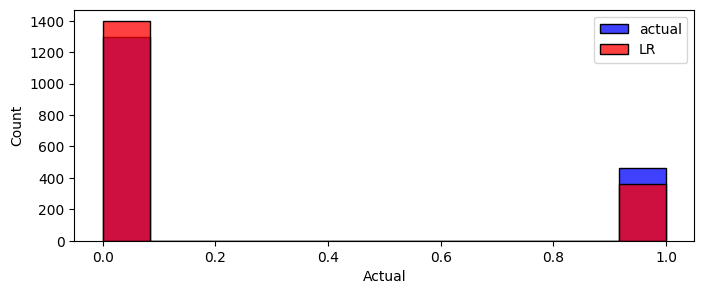

In [135]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', label="actual")
sns.histplot(output_df['Logistic Regression Predictions'], color='red', label="LR")

plt.legend()

In [136]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

0.27870528109028964

In [137]:

output_df['KNN'] = y_test_pred

output_df

,Actual,Logistic Regression Predictions,KNN
5616,0,0,0.0
2937,0,0,0.0
1355,0,0,0.4
5441,1,0,0.0
3333,0,0,0.0
...,...,...,...
5748,0,1,0.8
5172,0,0,0.2
994,0,0,0.0
6353,0,0,0.0


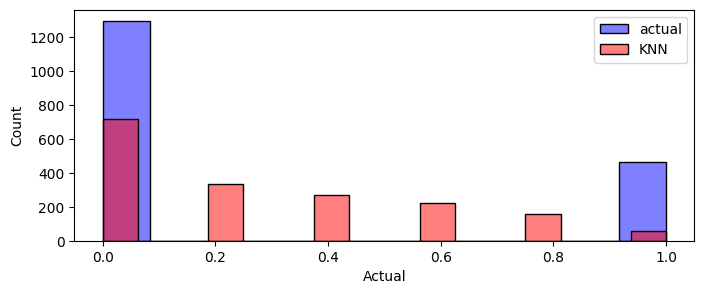

In [138]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['KNN'], color='red', alpha=0.5, label="KNN")

plt.legend()

In [139]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

0.27427597955706984

In [140]:
output_df['DT Regression Predictions'] = y_test_pred

output_df

,Actual,Logistic Regression Predictions,KNN,DT Regression Predictions
5616,0,0,0.0,1.0
2937,0,0,0.0,0.0
1355,0,0,0.4,0.0
5441,1,0,0.0,0.0
3333,0,0,0.0,0.0
...,...,...,...,...
5748,0,1,0.8,0.0
5172,0,0,0.2,0.0
994,0,0,0.0,0.0
6353,0,0,0.0,0.0


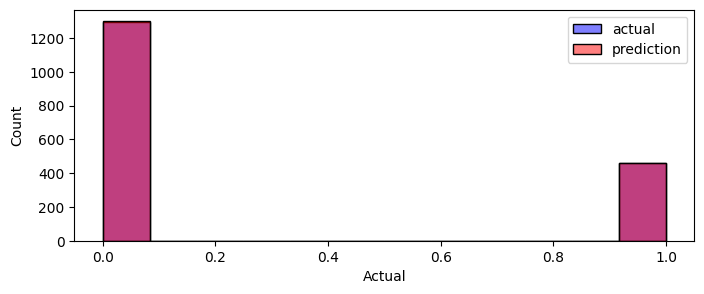

In [141]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['DT Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

0.27663923366052834

In [143]:
output_df['RF Regression Predictions'] = y_test_pred

output_df

,Actual,Logistic Regression Predictions,KNN,DT Regression Predictions,RF Regression Predictions
5616,0,0,0.0,1.0,0.29
2937,0,0,0.0,0.0,0.13
1355,0,0,0.4,0.0,0.32
5441,1,0,0.0,0.0,0.00
3333,0,0,0.0,0.0,0.02
...,...,...,...,...,...
5748,0,1,0.8,0.0,0.59
5172,0,0,0.2,0.0,0.00
994,0,0,0.0,0.0,0.00
6353,0,0,0.0,0.0,0.21


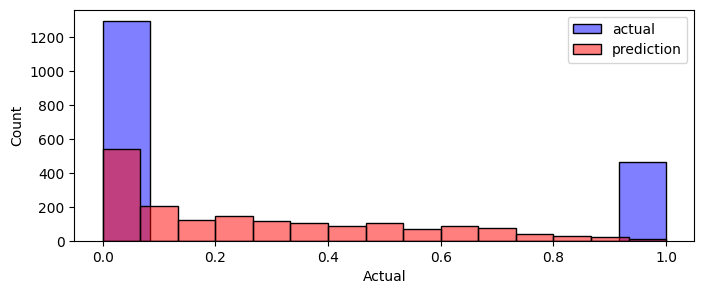

In [144]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual",multiple="stack")
sns.histplot(output_df['RF Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

In [145]:
output_df

,Actual,Logistic Regression Predictions,KNN,DT Regression Predictions,RF Regression Predictions
5616,0,0,0.0,1.0,0.29
2937,0,0,0.0,0.0,0.13
1355,0,0,0.4,0.0,0.32
5441,1,0,0.0,0.0,0.00
3333,0,0,0.0,0.0,0.02
...,...,...,...,...,...
5748,0,1,0.8,0.0,0.59
5172,0,0,0.2,0.0,0.00
994,0,0,0.0,0.0,0.00
6353,0,0,0.0,0.0,0.21


In [146]:
### Linear SVC Ploynomial Features

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

polynomial_svm_reg = make_pipeline(SVR(kernel="poly", degree=2, C=100))

polynomial_svm_reg.fit(X_train_transformed, y_train)

Pipeline(steps=[('svr', SVR(C=100, degree=2, kernel='poly'))])

In [147]:
y_test_pred = polynomial_svm_reg.predict(X_test_transformed)

In [148]:
output_df['Ploynomial SVR'] = y_test_pred

In [149]:
output_df

,Actual,Logistic Regression Predictions,KNN,DT Regression Predictions,RF Regression Predictions,Ploynomial SVR
5616,0,0,0.0,1.0,0.29,-0.035502
2937,0,0,0.0,0.0,0.13,0.045129
1355,0,0,0.4,0.0,0.32,0.112008
5441,1,0,0.0,0.0,0.00,0.079909
3333,0,0,0.0,0.0,0.02,0.066773
...,...,...,...,...,...,...
5748,0,1,0.8,0.0,0.59,0.639037
5172,0,0,0.2,0.0,0.00,0.021951
994,0,0,0.0,0.0,0.00,0.029591
6353,0,0,0.0,0.0,0.21,-0.059167


<Axes: title={'center': 'Actual Vs Ploynomial SVR'}, xlabel='Actual', ylabel='Count'>

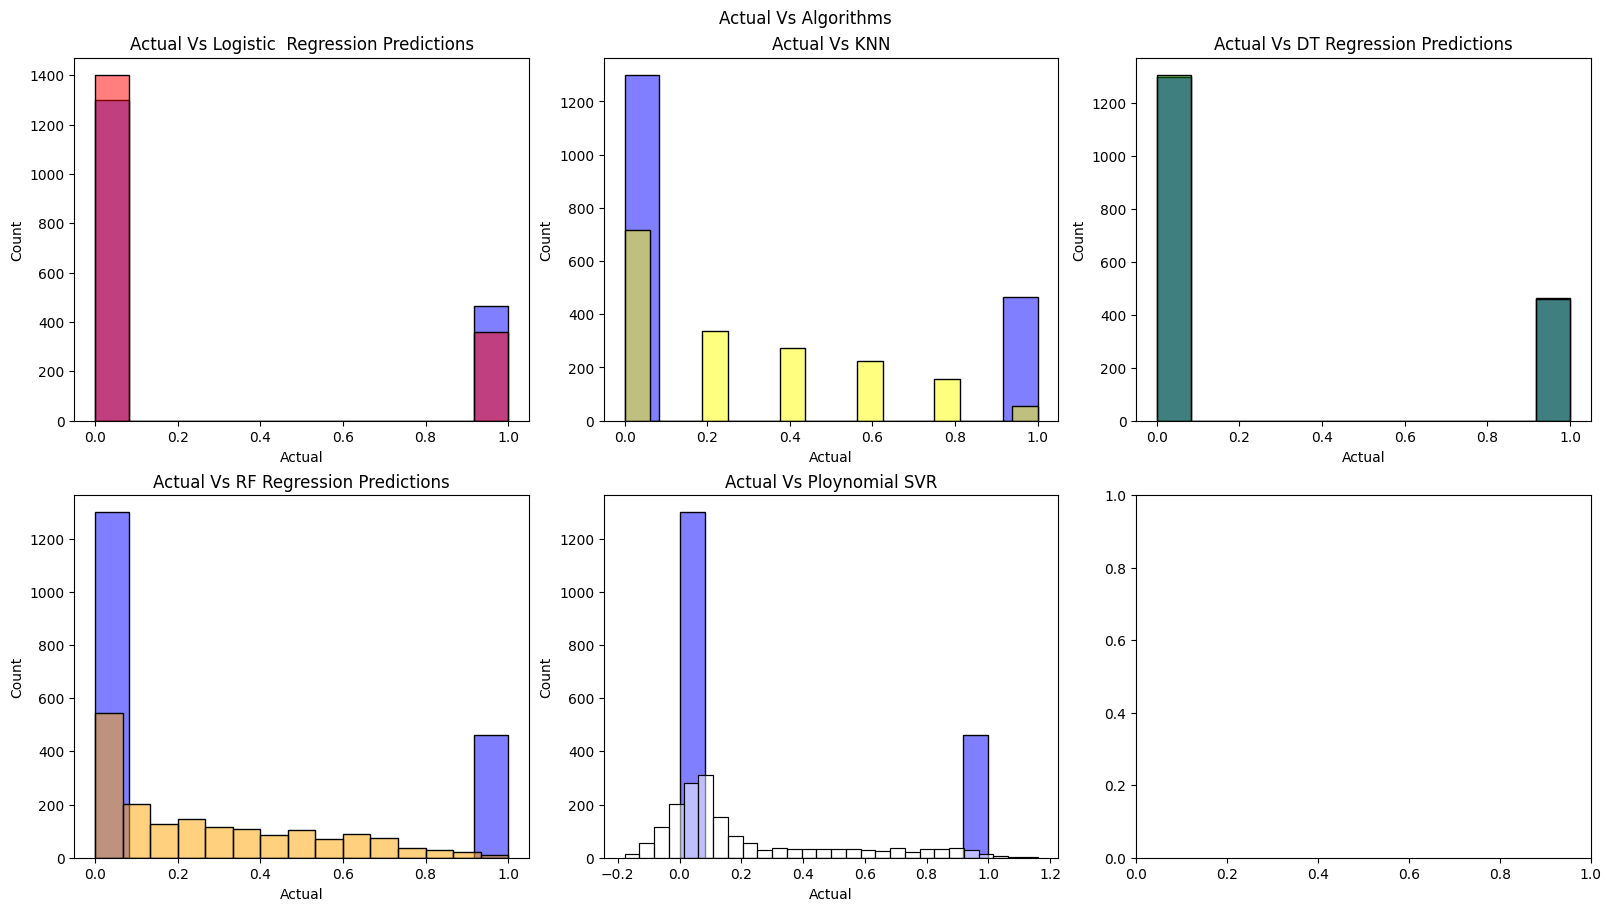

In [152]:
fig, axs = plt.subplots(2, 3, figsize=(16, 9), constrained_layout=True)
fig.suptitle("Actual Vs Algorithms")

axs[0,0].set_title("Actual Vs Logistic  Regression Predictions")
sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="Actual",ax=axs[0,0])
sns.histplot(output_df['Logistic Regression Predictions'], color='red', alpha=0.5, label="Logistic Regression Predictions",ax=axs[0,0])

axs[0,1].set_title("Actual Vs KNN")
sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="Actual",ax=axs[0,1])
sns.histplot(output_df['KNN'], color='yellow', alpha=0.5, label="KNN Regression Predictions",ax=axs[0,1])

axs[0,2].set_title("Actual Vs DT Regression Predictions")
sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="Actual",ax=axs[0,2])
sns.histplot(output_df['DT Regression Predictions'], color='green', alpha=0.5, label="DT Regression Predictions",ax=axs[0,2])

axs[1,0].set_title("Actual Vs RF Regression Predictions")
sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="Actual",ax=axs[1,0])
sns.histplot(output_df['RF Regression Predictions'], color='orange', alpha=0.5, label="RF Regression Predictions",ax=axs[1,0])

axs[1,1].set_title("Actual Vs Ploynomial SVR")
sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="Actual",ax=axs[1,1])
sns.histplot(output_df['Ploynomial SVR'], color='white', alpha=0.5, label="Ploynomial SVR",ax=axs[1,1])


In [153]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
tuned_parameters = [{'n_neighbors': [i for i in range(1,51)], 'p':[1,2,3]}]

clf = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=tuned_parameters,
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

clf.fit(X_train,y_train)

In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)
print(clf.best_score_)
print(clf.cv_results_)

cv_results = pd.DataFrame(clf.cv_results_)
cv_results.head()